# Capstone 2


## <span style="color:blue">BIG MART SALE PREDICTION DATA </span>
### Problem Statement -
#### The BigMart data scientists aim is to find out the sales of each product at a particular store.
#### and BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


In [3]:
#importing python liberaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 

#### Let's Load the data...

#### And Explore Train Data



In [4]:
#loding Train data

train_data=pd.read_csv('bigmart_train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### EXPLORATORY DATA ANALYSIS


#### Let's start exploring the data

In [5]:
#checking Columns in the dataset
print(train_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [6]:
#checking the shape of the data
train_data.shape

(8523, 12)

In [7]:
#checking number of column count
train_data.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [8]:
#getting information of datatype 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#Checking statistical information of data
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### * The average MRP of an item is 143.01 and max MRP is 266.9 and min price is 31.3
#### * The average Item outlet sales is 1794.33 and max sales is 13086.96 and min sales is 33.3

In [10]:
#identify mode value 
train_data.mode()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDG33,12.15,Low Fat,0.0,Fruits and Vegetables,172.0422,OUT027,1985.0,Medium,Tier 3,Supermarket Type1,958.752
1,FDW13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above anlysis we have checked all the information about the data. 

### Now Let's start cleaning the data 

## Checking Null Values in the Dataset

In [11]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Column Item_weight and Outlet_size contains NULL values

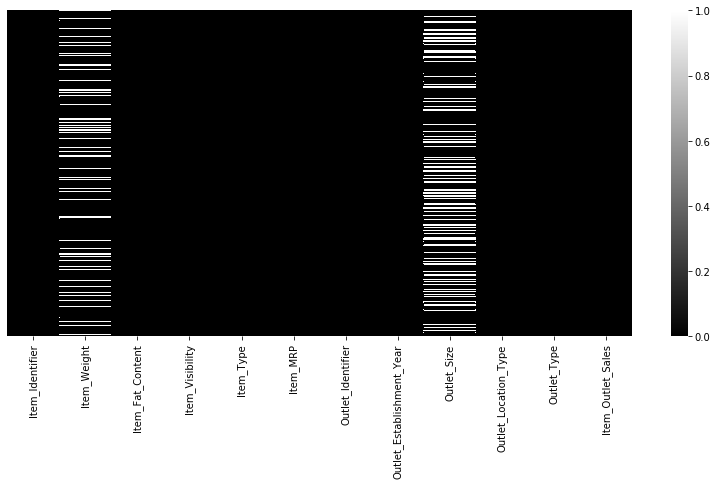

In [12]:
#ploting heatmap to represent the null values
#plt.style.use('classic')
plt.rcParams['figure.figsize'] = (14,6)
sns.heatmap(train_data.isnull(), yticklabels = False, cmap="gray");


In [13]:
findnull= pd.notnull(train_data)
    

In [14]:
print(findnull)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                True         True              True             True   
1                True         True              True             True   
2                True         True              True             True   
3                True         True              True             True   
4                True         True              True             True   
...               ...          ...               ...              ...   
8518             True         True              True             True   
8519             True         True              True             True   
8520             True         True              True             True   
8521             True         True              True             True   
8522             True         True              True             True   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0          True      True               True    

## Let's Replace Missing Values with Mode

In [15]:
#train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode(), inplace=True)
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])
train_data['Item_Weight'] =train_data['Item_Weight'].fillna(train_data['Item_Weight'].mode()[0])

In [16]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
#Validating Null values 
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.150,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


### After replacing the Null values with the mode, Now our data is  ready for Analysis.



## Let's start exploring outliers in dataset

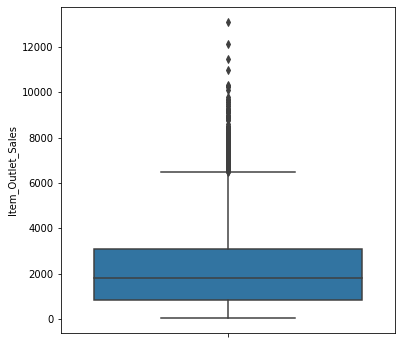

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(y= train_data['Item_Outlet_Sales'])

Average outlet sales is 2000

In [19]:
corr_matrix=train_data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.006443
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


### <font color='green'> ITEM_MRP seems to have a good correlation with targeted ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value </font>


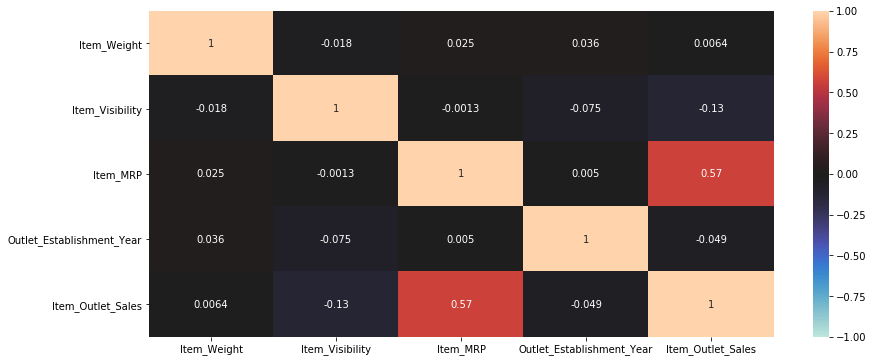

In [20]:
sns.heatmap(train_data.corr(), annot = True, vmin=-1, vmax=1, center= 0)


### <font color='green'> We can see the correlation b/w Item_MRP and Outlet Sales  </font>

## Visualizations
#### Let's explore columns and understand the data 


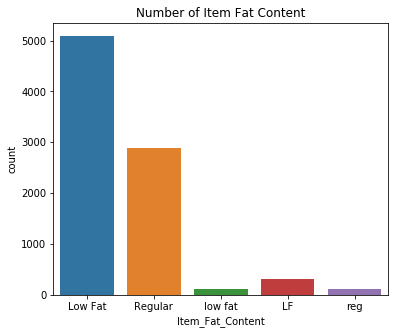

In [21]:
#Checking Iten Fat Content 

plt.figure(figsize=(6,5))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.title('Number of Item Fat Content')
plt.show()

#### From chart we can see - reg belong to Regular category and LF, low fat belong to same category that is Low Fat. 
#### So we have replaced that.

In [22]:
train_data.Item_Fat_Content.value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
train_data['Item_Fat_Content']= train_data['Item_Fat_Content'].replace('LF','Low Fat')
train_data['Item_Fat_Content']= train_data['Item_Fat_Content'].replace('low fat','Low Fat')
train_data['Item_Fat_Content']= train_data['Item_Fat_Content'].replace('reg','Regular')
train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

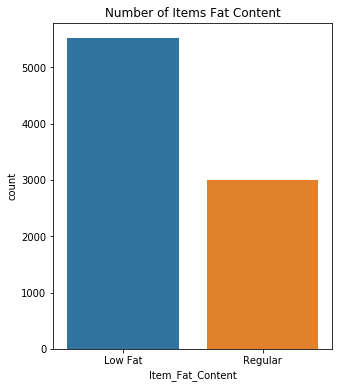

In [24]:
plt.figure(figsize=(5,6))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.title('Number of Items Fat Content')
plt.show()


### <font color='green'>Number of low fat content is high </font>
#### <font color='green'>We have 5517 Low Fat and 3006 Regular fat content</font>

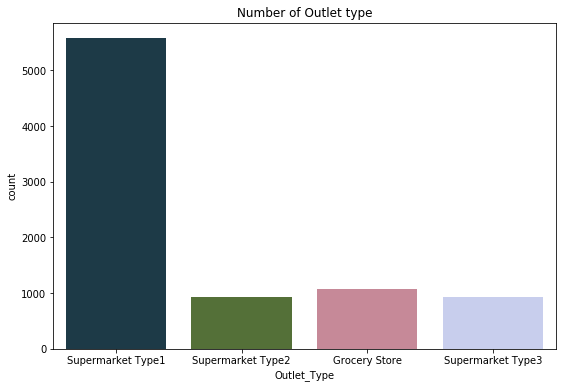

In [25]:
#Analysing Outlet type

plt.figure(figsize=(9,6))
plt.title('Number of Outlet type')
sns.countplot(x=train_data["Outlet_Type"], palette='cubehelix')


### <font color='green'>Mostly outlets type are Supermarket 1 type</font> 

Text(0.5, 1.0, 'Number of Item Type')

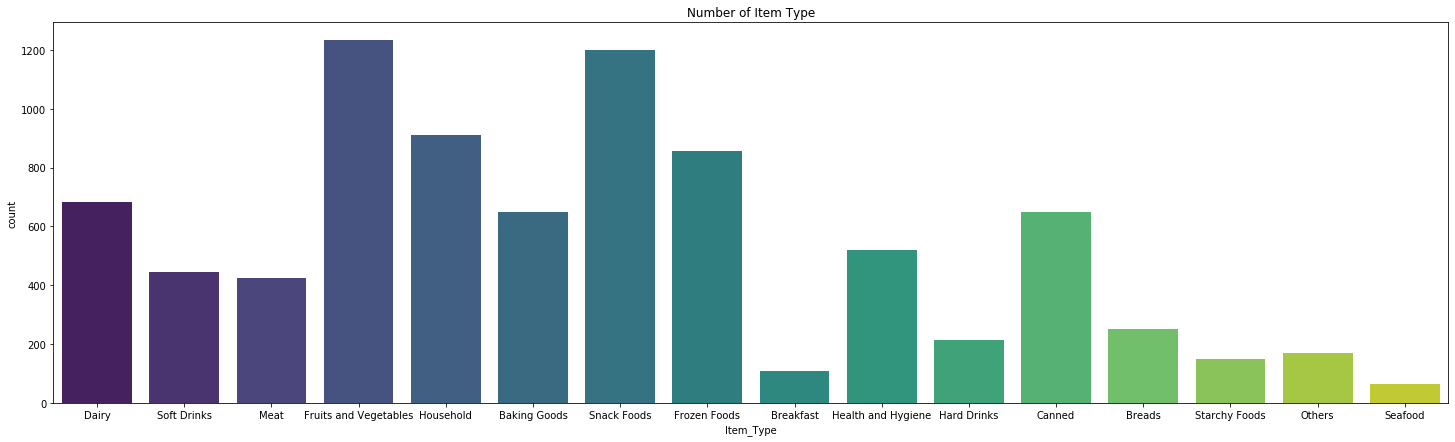

In [26]:
#Analyzing Item Type
plt.figure(figsize=(25,7))
sns.countplot(x=train_data['Item_Type'], palette='viridis')
plt.title('Number of Item Type')
#fig.legend(labels= train_data['Item_type'])
#plt.legend(labels=train_data['Item_Type'], title = "item_type")

In [27]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### <font color='green'>Fruites and Vegetables are sold the most and also we can see the good sales of Snack Foods as well.</font> 

Text(0.5, 1.0, 'Number of Outlet Size')

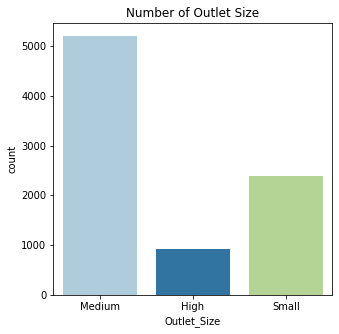

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=train_data, palette='Paired')
plt.title('Number of Outlet Size')

### <font color='green'>Outlets are more of Medium Size</font>

# Let's start In-depth Analysis 

### Now we are going to answering few questions and analyze out data accordingly - 
* Impact of item fat content on outlet sales.
* Find out store size affects the outlet sales.
* Find out Location of store affects the sales. 
* Find out the sales of all outlet. 
* Impact of Item type on sales.
* Find out item visibility impact the outlet sales.
* Impact of outlet establishment year on sales.
* Impact of Outlet Type on Outlet Sales
* Item Type vs item MRP 

### 1- Checking impact of Fat Content on Item Outlet Sales 

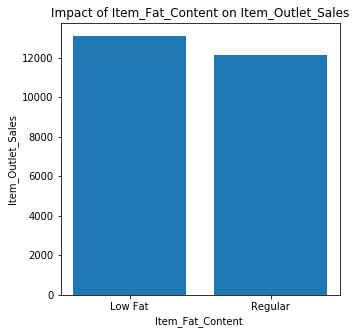

In [39]:
#plt.rcParams['figure.figsize']=(5,5)
plt.figure(figsize=(5,5))
#plt.bar(train_data['Item_Fat_Content'],train_data['Item_Outlet_Sales'])
plt.bar('Item_Fat_Content', 'Item_Outlet_Sales', data= train_data)
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.show()

#plt.figure(figsize=(5,5))
#sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train_data, estimator= sum,  palette= 'Set2', ci= None)
#plt.show()



### <font color='green'>Low Fat Content has the highest Outlet Sales in compare to Regular Items. </font>

### 2- Find out store size affects the outlet sales

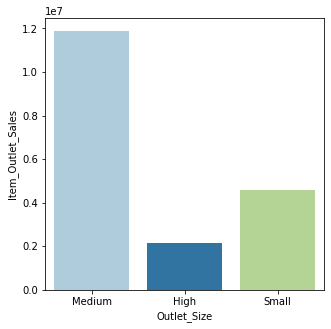

In [31]:
plt.figure(figsize=(5,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',estimator= sum ,data=train_data ,palette="Paired", ci = None)

plt.show()




### <font color='green'> Medium sized Outlets has highest Outlet sales. </font>
### <font color='green'> High size Outlets has minimum Outlet Sales. </font>


### 3- Find out Location of store affects the sales.

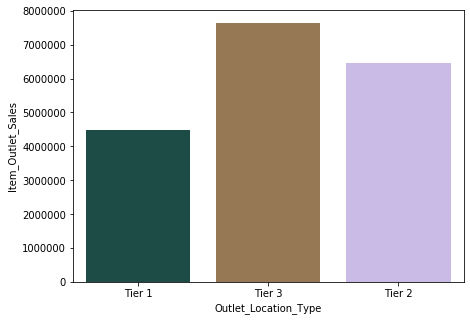

In [40]:
plt.figure(figsize=(7,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=train_data,estimator= sum ,palette="cubehelix", ci = None)
plt.show()

### <font color ='green'>Tier 3 location has the highest number of Outlet sales </font>

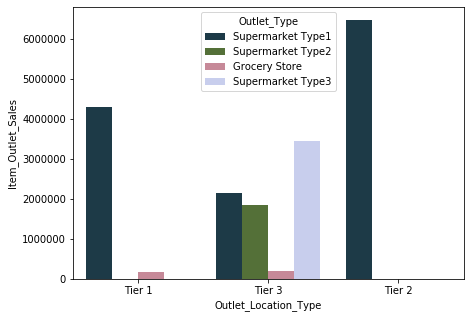

In [32]:
plt.figure(figsize=(7,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=train_data,estimator= sum ,palette="cubehelix", hue= 'Outlet_Type' ,ci = None)
plt.show()

### <font color= 'green'> Tier 3 location has the all type of Outlets and It has Highest sales.   </font> 

### 4- Find out the sales of all outlet

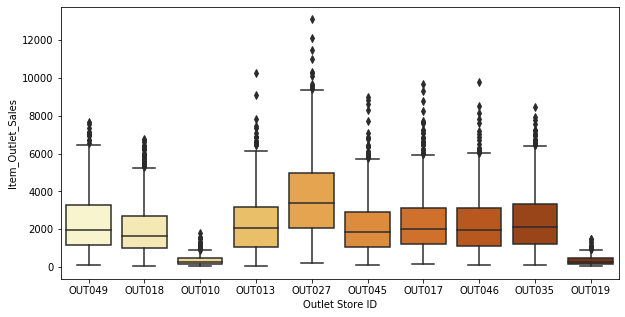

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot('Outlet_Identifier','Item_Outlet_Sales',data=train_data, palette ='YlOrBr')
plt.xlabel('Outlet Store ID')
plt.show()

### <font color= 'green'> Highest Sales was generated at Outlet 'OUT027'</font>
### <font color= 'green'> All Outlet Store have average 2000 outlet sales Except OUT010 and OUT019 </font>



### 5- Impact of Item type on sales

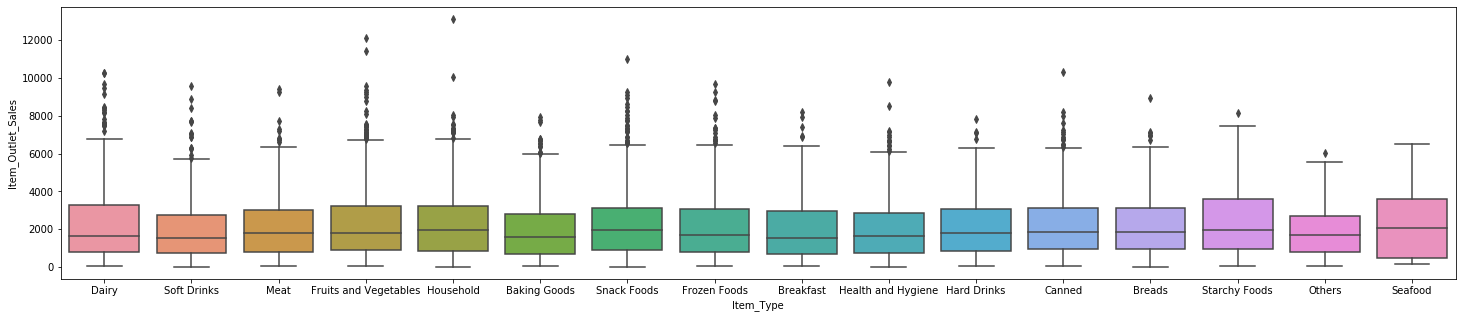

In [34]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Item_Type',y="Item_Outlet_Sales", data=train_data)


### <font color='green'> Dairy, Sea food and Starchy Foods have the Highest Sales. Starchy Foods and Sea food have highest average Item sales</font>

### 6- Find out item visibility impact the outlet sales


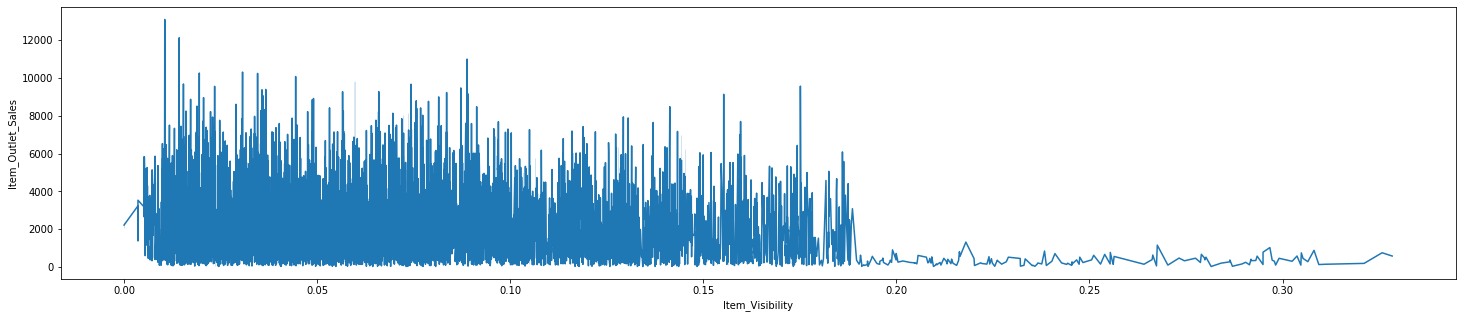

In [35]:
plt.figure(figsize=(25,5))
sns.lineplot(x='Item_Visibility',y="Item_Outlet_Sales", data=train_data)

### <font color='green'>  </font>

### 7-Trend of outlet establishment year on sales

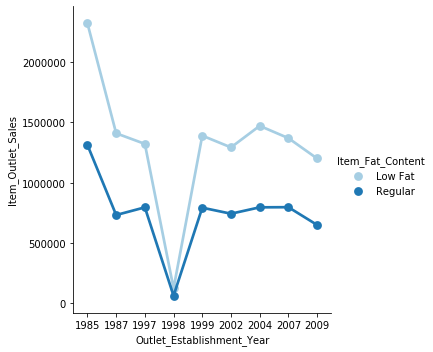

In [45]:
#plt.figure(figsize=(15,5))
plt.rcParams['figure.figsize']=(15,5)
sns.catplot('Outlet_Establishment_Year','Item_Outlet_Sales',estimator=sum ,data=train_data,palette="Paired",hue='Item_Fat_Content', kind='point' ,ci=None)
plt.show()

### <font color= 'green'> The highest Item outlet sales is recorded by stores established in 1985. </font>
### <font color= 'green'> Minimum sale report in established year 1998 </font>

### 8- Impact of Outlet Type on Outlet Sales

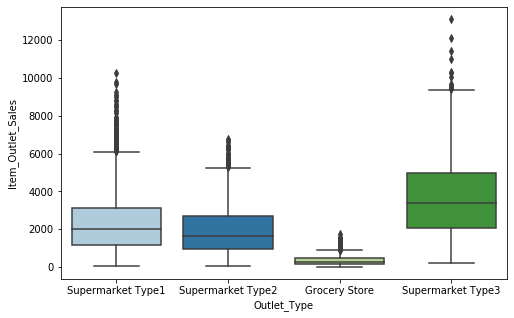

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot('Outlet_Type','Item_Outlet_Sales',data=train_data,palette="Paired")
plt.show()

### <font color= 'green'> Store Type 3 has highest average sales </font>


### 9- ITEM TYPE VS ITEM MRP


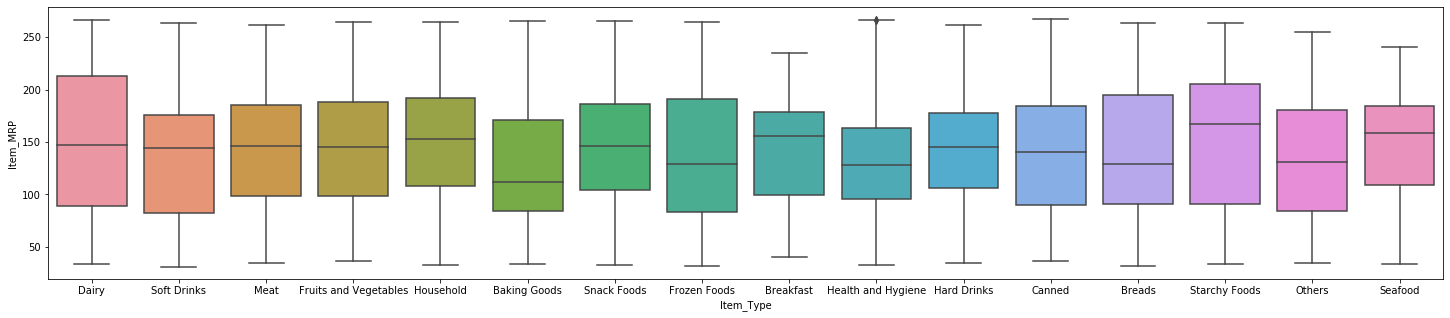

In [38]:
plt.figure(figsize=(25,5))
sns.boxplot('Item_Type','Item_MRP',data=train_data)
plt.show()

### <font color= 'green'>  Starchy Foods have highest average Item MRP</font>
### <font color= 'green'>  Dairy and Starchy Foods have the Highest Mrps(200-250 dollars).</font>



# Key Observations:


* The Items are mostly of Low Fat.
* Fruits and Vegetables are largely sold as people tend to use them on daily purpose. Snack Foods too have good sales.
* The Outlets are more of Medium Size
* The Outlets are mostly of Supermarket Type1.
* The Item Outles sales are higher for Low Fat compared to Regular Item types. 
* Fruits and Vegetables generated most Sales where as Seafood generated the least sales accross all stores.
* Most Sales was generated at Outlet 'OUT027'.
* Supermarket Type 1 has the heighest Sales.
* The Outlet Sales is maximum for Medium sized Outlets. High size Outlets can improve the Outlet Sales.
* Dairy and Starchy Foods have the Highest Mrps(200-250 dollars). Starchy Foods have highest average Item MRP
* Average sales are the same across stores established from 1985 to 2009(except for the 1998 established store)
  The highest Item outlet sales is recorded by stores established in 1985.
* 'Fruits and Vegetables' have the highest Total Profit.